# Q1

In [1]:
# !pip uninstall pyecharts
# !pip install pyecharts==1.9.0

In [2]:
# !pip install -i https://pypi.tuna.tsinghua.edu.cn/simple echarts-countries-pypkg    
# 全球国家地图
# !pip install -i https://pypi.tuna.tsinghua.edu.cn/simple echarts-china-provinces-pypkg  
# 中国省级地图
# !pip install -i https://pypi.tuna.tsinghua.edu.cn/simple echarts-china-cities-pypkg      
#     # 中国市级地图
# !pip install -i https://pypi.tuna.tsinghua.edu.cn/simple echarts-china-counties-pypkg    
#     # 中国县区级地图

In [5]:
import matplotlib.pyplot as plt
import datetime
import json
from pylab import mpl
import csv
from urllib.request import urlopen, quote
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.charts import Geo
from pyecharts.globals import ChartType, SymbolType, CurrentConfig,ThemeType, GeoType

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
#mpl.rcParams['font.sans-serif'] = ['Songti SC'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题


In [7]:
# 处理数据  日期为 X 轴 新增人数为 Y 轴
info = """2020-01-23  0
2020-01-24  105
2020-01-25  212
2020-01-26  297
2020-01-27  365
2020-01-28  2131
2020-01-29  0
2020-01-30  1349
2020-01-31  903
2020-02-01  1347
2020-02-02  4024
2020-02-03  2345
2020-02-04  3156
2020-02-05  2987
2020-02-06  2447
2020-02-07  2841
2020-02-08  2147
2020-02-09  2531
2020-02-10  2097
2020-02-11  1638
2020-02-12  0
2020-02-13  14840
2020-02-14  6200
2020-02-15  1843
2020-02-16  1933
2020-02-17  1807
2020-02-18  1693
2020-02-19  349
2020-02-20  411
2020-02-21  220
2020-02-22  1422
2020-02-23  0
2020-02-24  203
2020-02-25  499
2020-02-26  401
2020-02-27  409
2020-02-28  318
2020-02-29  423
2020-03-01  570
2020-03-02  196
2020-03-03  114
2020-03-04  115
2020-03-05  134
2020-03-06  126
2020-03-07  74
2020-03-08  41
2020-03-09  36
2020-03-10  17
2020-03-11  13
2020-03-12  8
2020-03-13  5
2020-03-14  4
2020-03-15  4"""
data = {}
for line in info.split("\n"):
    line_split = line.split()
    data[line_split[0]] = int(line_split[1])

print(data)

{'2020-01-23': 0, '2020-01-24': 105, '2020-01-25': 212, '2020-01-26': 297, '2020-01-27': 365, '2020-01-28': 2131, '2020-01-29': 0, '2020-01-30': 1349, '2020-01-31': 903, '2020-02-01': 1347, '2020-02-02': 4024, '2020-02-03': 2345, '2020-02-04': 3156, '2020-02-05': 2987, '2020-02-06': 2447, '2020-02-07': 2841, '2020-02-08': 2147, '2020-02-09': 2531, '2020-02-10': 2097, '2020-02-11': 1638, '2020-02-12': 0, '2020-02-13': 14840, '2020-02-14': 6200, '2020-02-15': 1843, '2020-02-16': 1933, '2020-02-17': 1807, '2020-02-18': 1693, '2020-02-19': 349, '2020-02-20': 411, '2020-02-21': 220, '2020-02-22': 1422, '2020-02-23': 0, '2020-02-24': 203, '2020-02-25': 499, '2020-02-26': 401, '2020-02-27': 409, '2020-02-28': 318, '2020-02-29': 423, '2020-03-01': 570, '2020-03-02': 196, '2020-03-03': 114, '2020-03-04': 115, '2020-03-05': 134, '2020-03-06': 126, '2020-03-07': 74, '2020-03-08': 41, '2020-03-09': 36, '2020-03-10': 17, '2020-03-11': 13, '2020-03-12': 8, '2020-03-13': 5, '2020-03-14': 4, '2020-03-

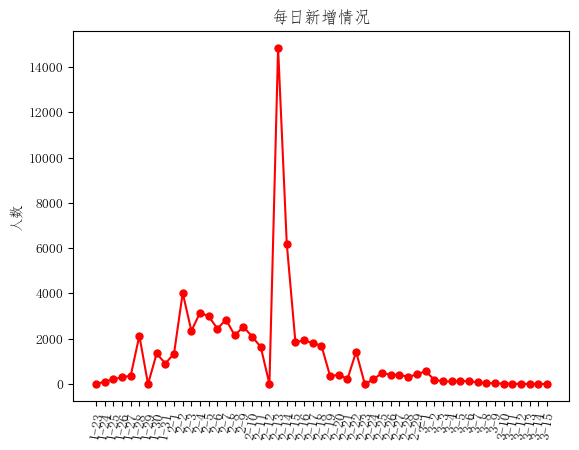

In [12]:
#绘制每日新增情况
X = list(data.keys())

convert_X = []
for text in X:
    y_m_d = datetime.datetime.strptime(text, '%Y-%m-%d')
    text = str(y_m_d.month) + "-" + str(y_m_d.day)
    convert_X.append(text)
Y = list(data.values())

plt.plot(convert_X,Y,color='r', marker='o',markersize=5)

plt.xticks(convert_X ,rotation = 80) #添加x轴标签，旋转45度
plt.title("每日新增情况")  # 绘制标题
plt.ylabel("人数")   # 绘制 y 轴标签
plt.show()

# Q2

In [21]:
# 数据处理 

result = {'province':[],'province_confirmedCount':[]}


with open("./data/中国各省疫情数据0123至0315.csv",'r',encoding='gbk') as csvFile:
    reader = csv.reader(csvFile)

    for item in reader:
            if item[1] =="2020年2月20日":
                result['province'].append(item[0])
                result['province_confirmedCount'].append(int(item[5]))
print(result)

{'province': ['安徽省', '澳门特别行政区', '北京市', '福建省', '甘肃省', '广东省', '广西壮族自治区', '贵州省', '海南省', '河北省', '河南省', '黑龙江省', '湖北省', '湖南省', '吉林省', '江苏省', '江西省', '辽宁省', '内蒙古自治区', '宁夏回族自治区', '青海省', '山东省', '山西省', '陕西省', '上海市', '四川省', '台湾省', '天津市', '西藏自治区', '香港特别行政区', '新疆维吾尔自治区', '云南省', '浙江省', '重庆市'], 'province_confirmedCount': [987, 10, 395, 293, 91, 1332, 245, 146, 168, 307, 1265, 476, 62442, 1010, 91, 631, 934, 121, 75, 71, 18, 546, 132, 245, 334, 520, 24, 131, 1, 68, 76, 174, 1175, 567]}


In [23]:
# 绘制地图
#from pyecharts import options as opts
from pyecharts.charts import Map

map = Map()
map.add("确诊人数", [list(z) for z in zip(result['province'],result['province_confirmedCount'])],'china')
map.set_global_opts(
    title_opts=opts.TitleOpts(title="2月20日累计确诊人数地图"),
    visualmap_opts=opts.VisualMapOpts(max_=2000),
)
map.render(path="./result/2月20日全国累计确诊人数地图.html")

'C:\\Users\\Lenovo\\data_visible\\result\\2月20日全国累计确诊人数地图.html'

# Q3

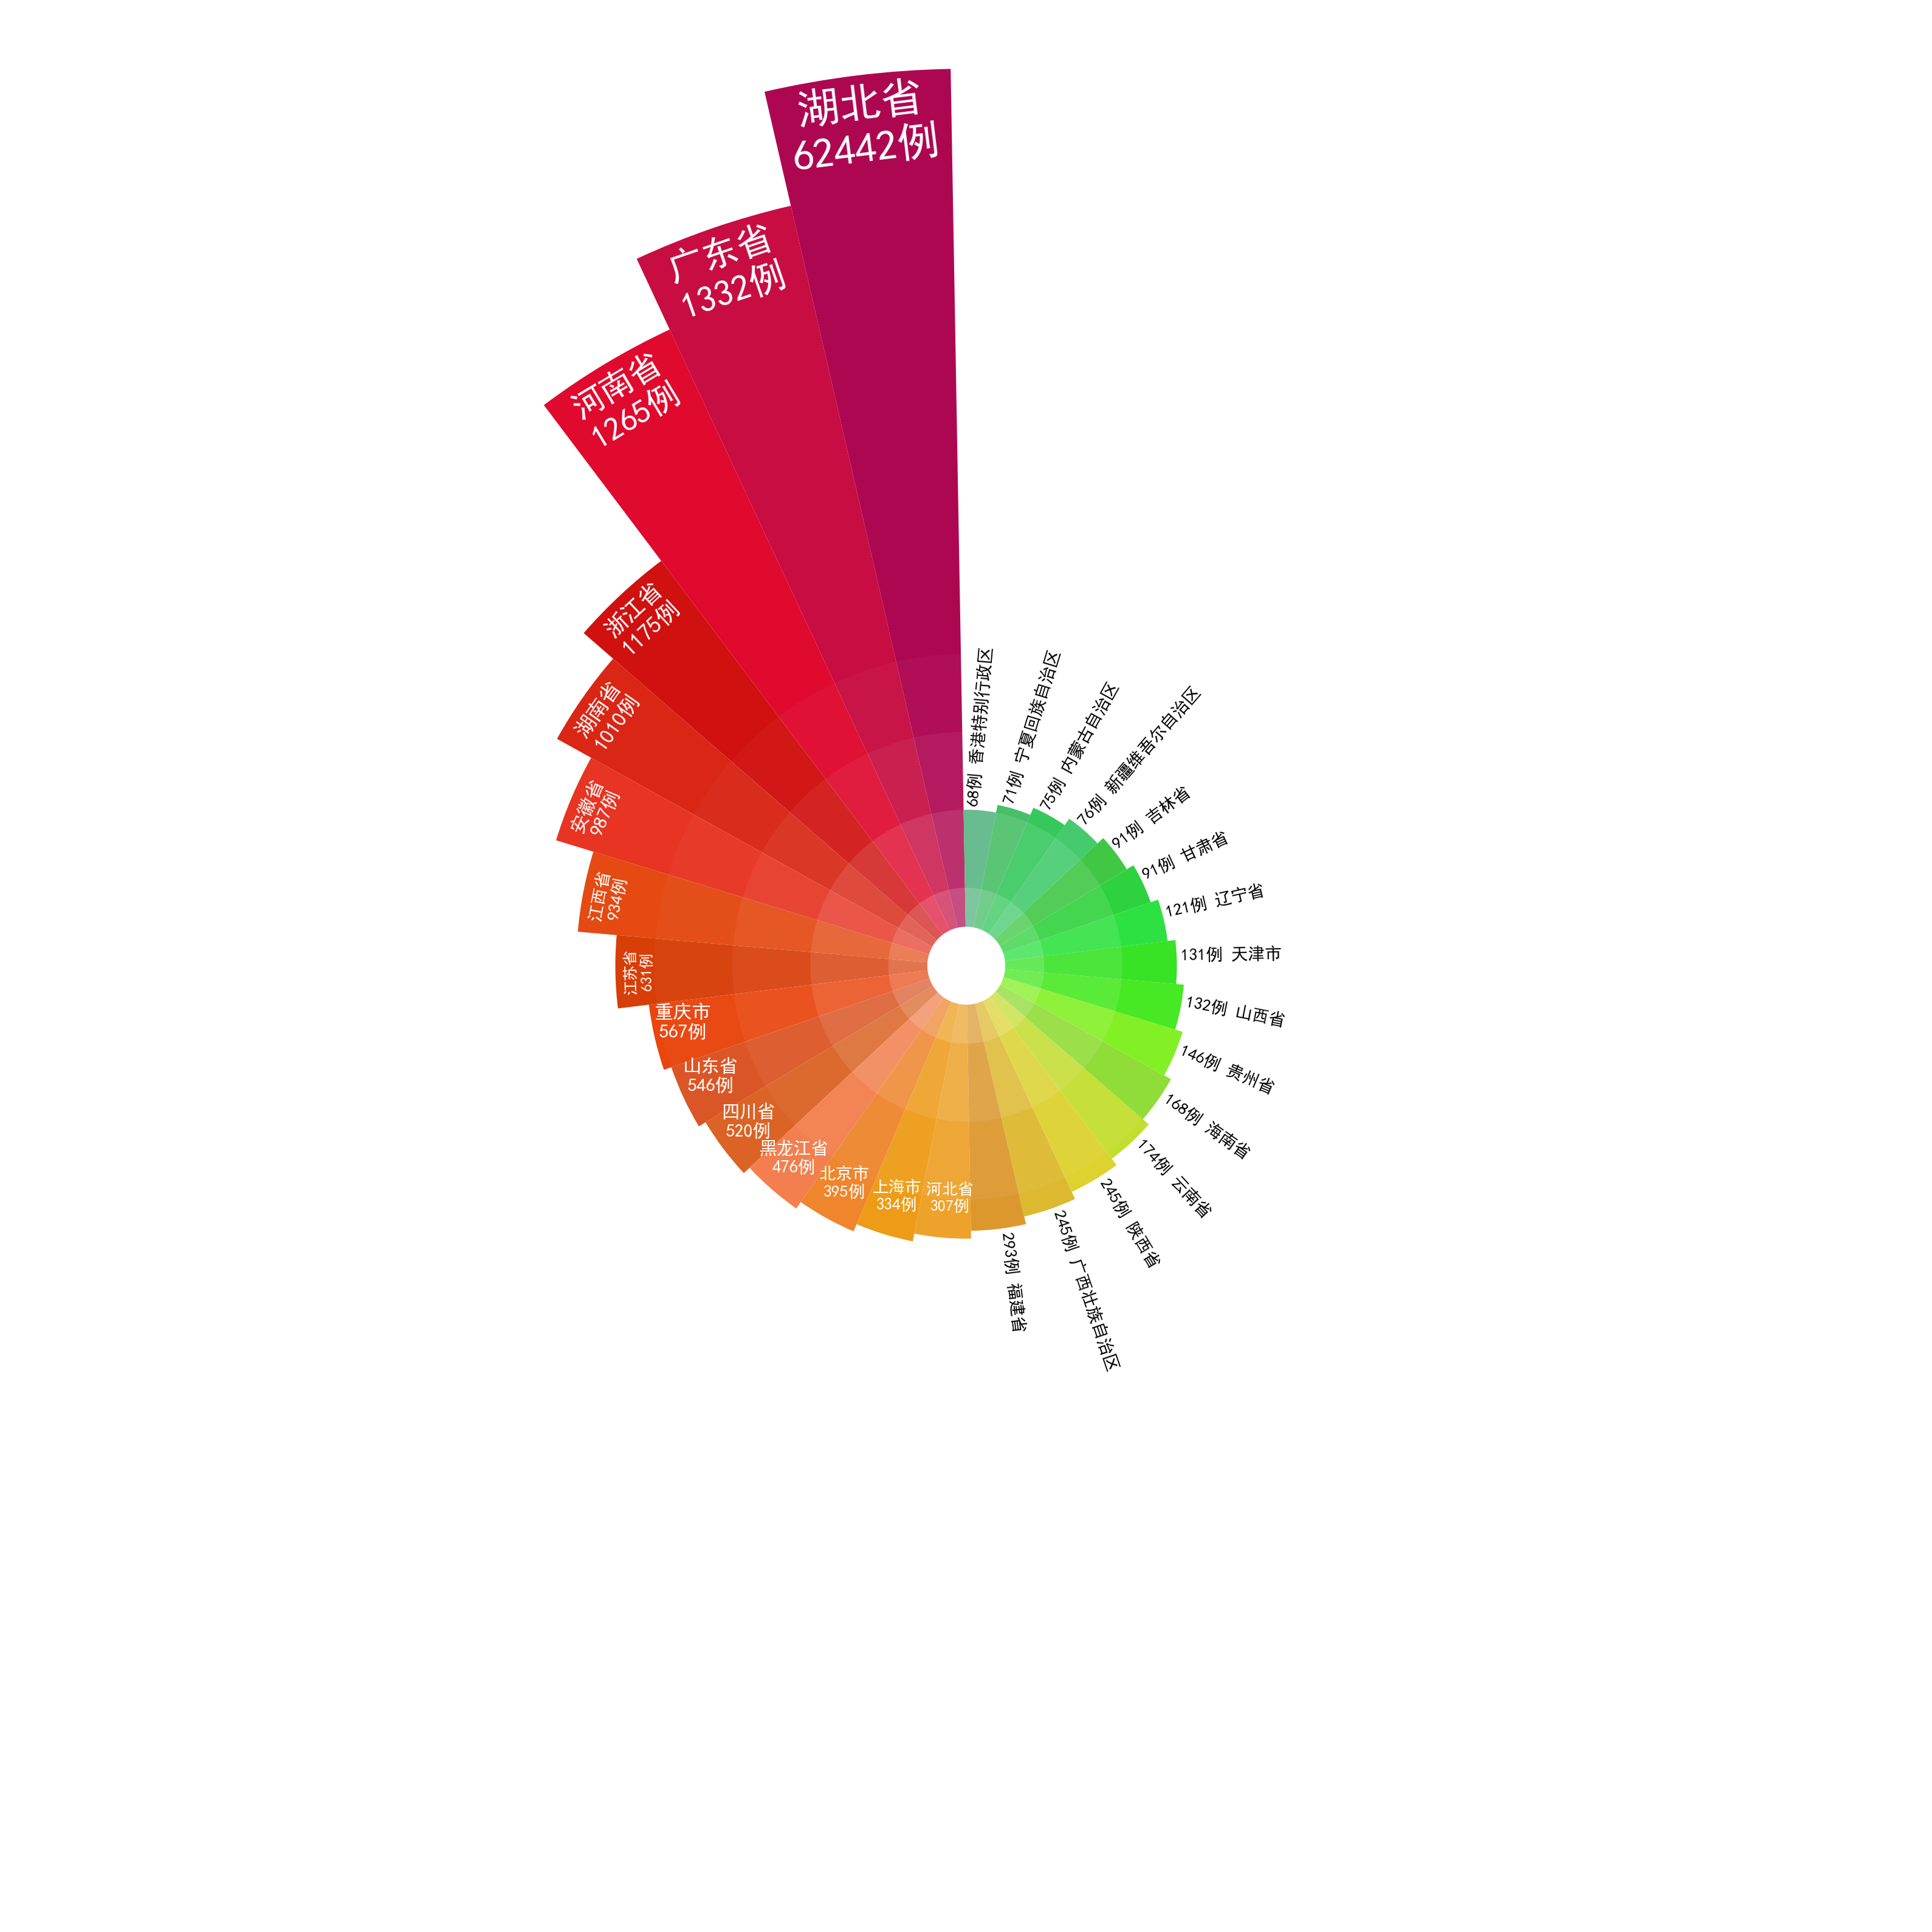

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def rosetype_pie(country,confirmed,size,colors):
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文显示
    #plt.rcParams['font.sans-serif'] = ['Songti SC']  # 中文显示

    num= len(size) # 柱子的数量
    width = 2 * np.pi / num # 每个柱子的宽度
    rad = np.cumsum([width] * num)  # 每个柱子的角度
    
    plt.figure(figsize=(8, 8),dpi=500,)  # 创建画布
    ax = plt.subplot(projection='polar')
    ax.set_ylim(-1, np.ceil(max(size) + 1))  # 中间空白,-1为空白半径大小，可自行调整
    ax.set_theta_zero_location('N',-5.0)  # 设置极坐标的起点方向 W,N,E,S, -5.0为偏离数值，可自行调整
    ax.set_theta_direction(1) # 1为逆时针，-1为顺时针
    ax.grid(False)  # 不显示极轴
    ax.spines['polar'].set_visible(False)  # 不显示极坐标最外的圆形
    ax.set_yticks([])  # 不显示坐标间隔
    ax.set_thetagrids([])  # 不显示极轴坐标

    ax.bar(rad, size, width=width, color=colors, alpha=1) # 画图
    ax.bar(rad, 1, width=width, color='white', alpha=0.15)  # 中间添加白色色彩使图案变浅
    ax.bar(rad, 3, width=width, color='white', alpha=0.1)  # 中间添加白色色彩使图案变浅
    ax.bar(rad, 5, width=width, color='white', alpha=0.05)  # 中间添加白色色彩使图案变浅
    ax.bar(rad, 7, width=width, color='white', alpha=0.03)  # 中间添加白色色彩使图案变浅

    # 设置text
    for i in np.arange(num):
        if i < 8:
            ax.text(rad[i],  # 角度
                    size[i]-0.2,  # 长度
                    country[i]+'\n'+str(confirmed[i])+'例',  # 文本
                    rotation=rad[i] * 180 / np.pi -5,  # 文字角度
                    rotation_mode='anchor',
                    # alpha=0.8,#透明度
                    fontstyle='normal',# 设置字体类型，可选参数[ ‘normal’ | ‘italic’ | ‘oblique’ ]，italic斜体，oblique倾斜
                    fontweight='black', # 设置字体粗细，可选参数 [‘light’, ‘normal’, ‘medium’, ‘semibold’, ‘bold’, ‘heavy’, ‘black’]
                    color='white', # 设置字体颜色
                    size=size[i]/2.2, # 设置字体大小
                    ha="center", # 'left','right','center'
                    va="top", # 'top', 'bottom', 'center', 'baseline', 'center_baseline'
                    )
        elif i < 15:
            ax.text(rad[i]+0.02,
                    size[i]-0.7,
                    country[i] + '\n' + str(confirmed[i]) + '例',
                    fontstyle='normal',
                    fontweight='black',
                    color='white',
                    size=size[i] / 1.6,
                    ha="center",
                    )
        else:
            ax.text(rad[i],
                    size[i]+0.1,
                    str(confirmed[i]) + '例 ' + country[i],
                    rotation=rad[i] * 180 / np.pi + 85,
                    rotation_mode='anchor',
                    fontstyle='normal',
                    fontweight='black',
                    color='black',
                    size=4,
                    ha="left",
                    va="bottom",
                    )

    plt.show()


if __name__ == '__main__':
    #df = pd.read_csv('Wuhan-2019-nCoV.csv') # 利用pandas读取数据
    colors = [(0.68359375, 0.02734375, 0.3203125),
                    (0.78125, 0.05078125, 0.2578125),
                    (0.875, 0.0390625, 0.1796875),
                    (0.81640625, 0.06640625, 0.0625),
                    (0.8515625, 0.1484375, 0.08203125),
                    (0.90625, 0.203125, 0.13671875),
                    (0.89453125, 0.2890625, 0.0703125),
                    (0.84375, 0.2421875, 0.03125),
                    (0.9140625, 0.26953125, 0.05078125),
                    (0.85546875, 0.31640625, 0.125),
                    (0.85546875, 0.3671875, 0.1171875),
                    (0.94921875, 0.48046875, 0.28125),
                    (0.9375, 0.51171875, 0.1484375),
                    (0.93359375, 0.59765625, 0.0625),
                    (0.93359375, 0.62890625, 0.14453125),
                    (0.86328125, 0.5859375, 0.15234375),
                    (0.86328125, 0.71875, 0.16015625),
                    (0.86328125, 0.8203125, 0.16015625),
                    (0.76171875, 0.8671875, 0.16015625),
                    (0.53125, 0.85546875, 0.15625),
                    (0.4765625, 0.94140625, 0.0703125),
                    (0.21484375, 0.91015625, 0.0625),
                    (0.15234375, 0.88671875, 0.08203125),
                    (0.11328125, 0.87890625, 0.19921875),
                    (0.11328125, 0.8125, 0.1796875),
                    (0.1875, 0.76953125, 0.2109375),
                    (0.2109375, 0.78125, 0.38671875),
                    (0.1484375, 0.76953125, 0.30859375),
                    (0.22265625, 0.73046875, 0.35546875),
                    (0.2890625, 0.6875, 0.4765625)]                             # 转化为小数的rgb色列表 34个颜色

    df = pd.DataFrame(columns=['province','province_confirmedCount'])  # 省份及确诊人数
    df.province = result['province']
    df.province_confirmedCount = result['province_confirmedCount']
    df=df.sort_values('province_confirmedCount',ascending=False)
    provice34 = df['province'].tolist()   # 转换为 list
    confirmed = df['province_confirmedCount'].tolist()
    size = [22 , 19, 17, 12, 11, 10, 9, 8, 7.2, 7.0, 6.8, 6.6, 6.4, 6.2, 6.0, 5.8, 5.6, 5.4, 5.2, 5.0, 4.8, 4.6, 4.4, 4.2, 4.0, 3.8, 3.6, 3.4, 3.2, 3.0] # 自定义一个柱长度列
    rosetype_pie(provice34, confirmed, size, colors)   



# Q4

统计3月15日各省累计治愈人数并绘制对比图

In [86]:
result = {'province':[],'province_confirmedCount':[]}


with open("./data/中国各省疫情数据0123至0315.csv",'r',encoding='gbk') as csvFile:
    reader = csv.reader(csvFile)
    for item in reader:
            if item[1] =="2020年3月15日":
                result['province'].append(item[0])
                if item[7]=='':
                    result['province_confirmedCount'].append(0)
                else:
                    result['province_confirmedCount'].append(int(item[7]))
# result['province_confirmedCount'].sort(reverse=True)
print(result)

{'province': ['安徽省', '澳门特别行政区', '北京市', '福建省', '甘肃省', '广东省', '广西壮族自治区', '贵州省', '海南省', '河北省', '河南省', '黑龙江省', '湖北省', '湖南省', '吉林省', '江苏省', '江西省', '辽宁省', '内蒙古自治区', '宁夏回族自治区', '青海省', '山东省', '山西省', '陕西省', '上海市', '四川省', '台湾省', '天津市', '西藏自治区', '香港特别行政区', '新疆维吾尔自治区', '云南省', '浙江省', '重庆市'], 'province_confirmedCount': [984, 10, 353, 295, 91, 1304, 243, 143, 160, 310, 1250, 453, 54288, 1014, 91, 631, 934, 114, 71, 73, 18, 741, 133, 232, 324, 516, 0, 133, 1, 81, 73, 172, 1211, 570]}


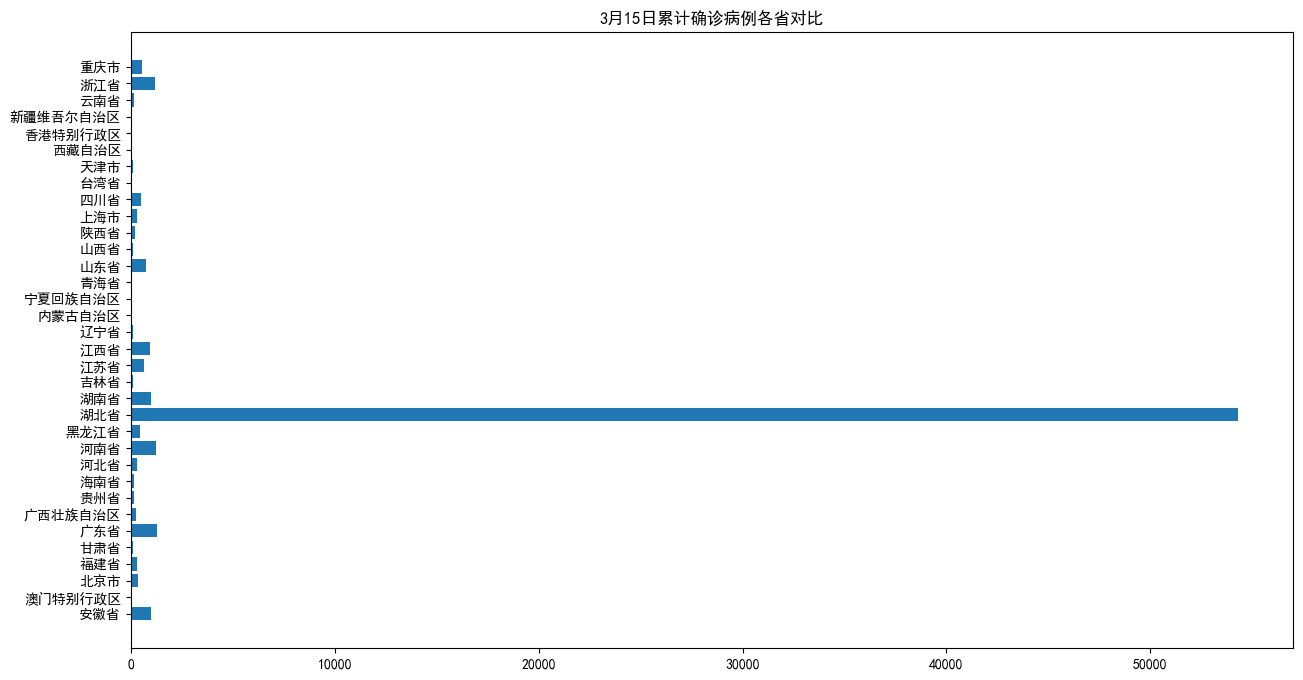

In [80]:
bar_width = 0.8  #柱的宽度
fig = plt.figure(figsize = (15,8))

plt.barh(result['province'],result['province_confirmedCount'],bar_width)
plt.title("3月15日累计确诊病例各省对比")  # 绘制标题
plt.show()

In [88]:
# 绘制地图
#from pyecharts import options as opts
from pyecharts.charts import Map

map = Map()
map.add("治愈人数", [list(z) for z in zip(result['province'],result['province_confirmedCount'])],'china')
map.set_global_opts(
    title_opts=opts.TitleOpts(title="3月15日累计治愈人数地图"),
    visualmap_opts=opts.VisualMapOpts(max_=2000),
)
map.render(path="./result/3月15日全国累计治愈人数地图.html")

'C:\\Users\\Lenovo\\data_visible\\result\\3月15日全国累计治愈人数地图.html'

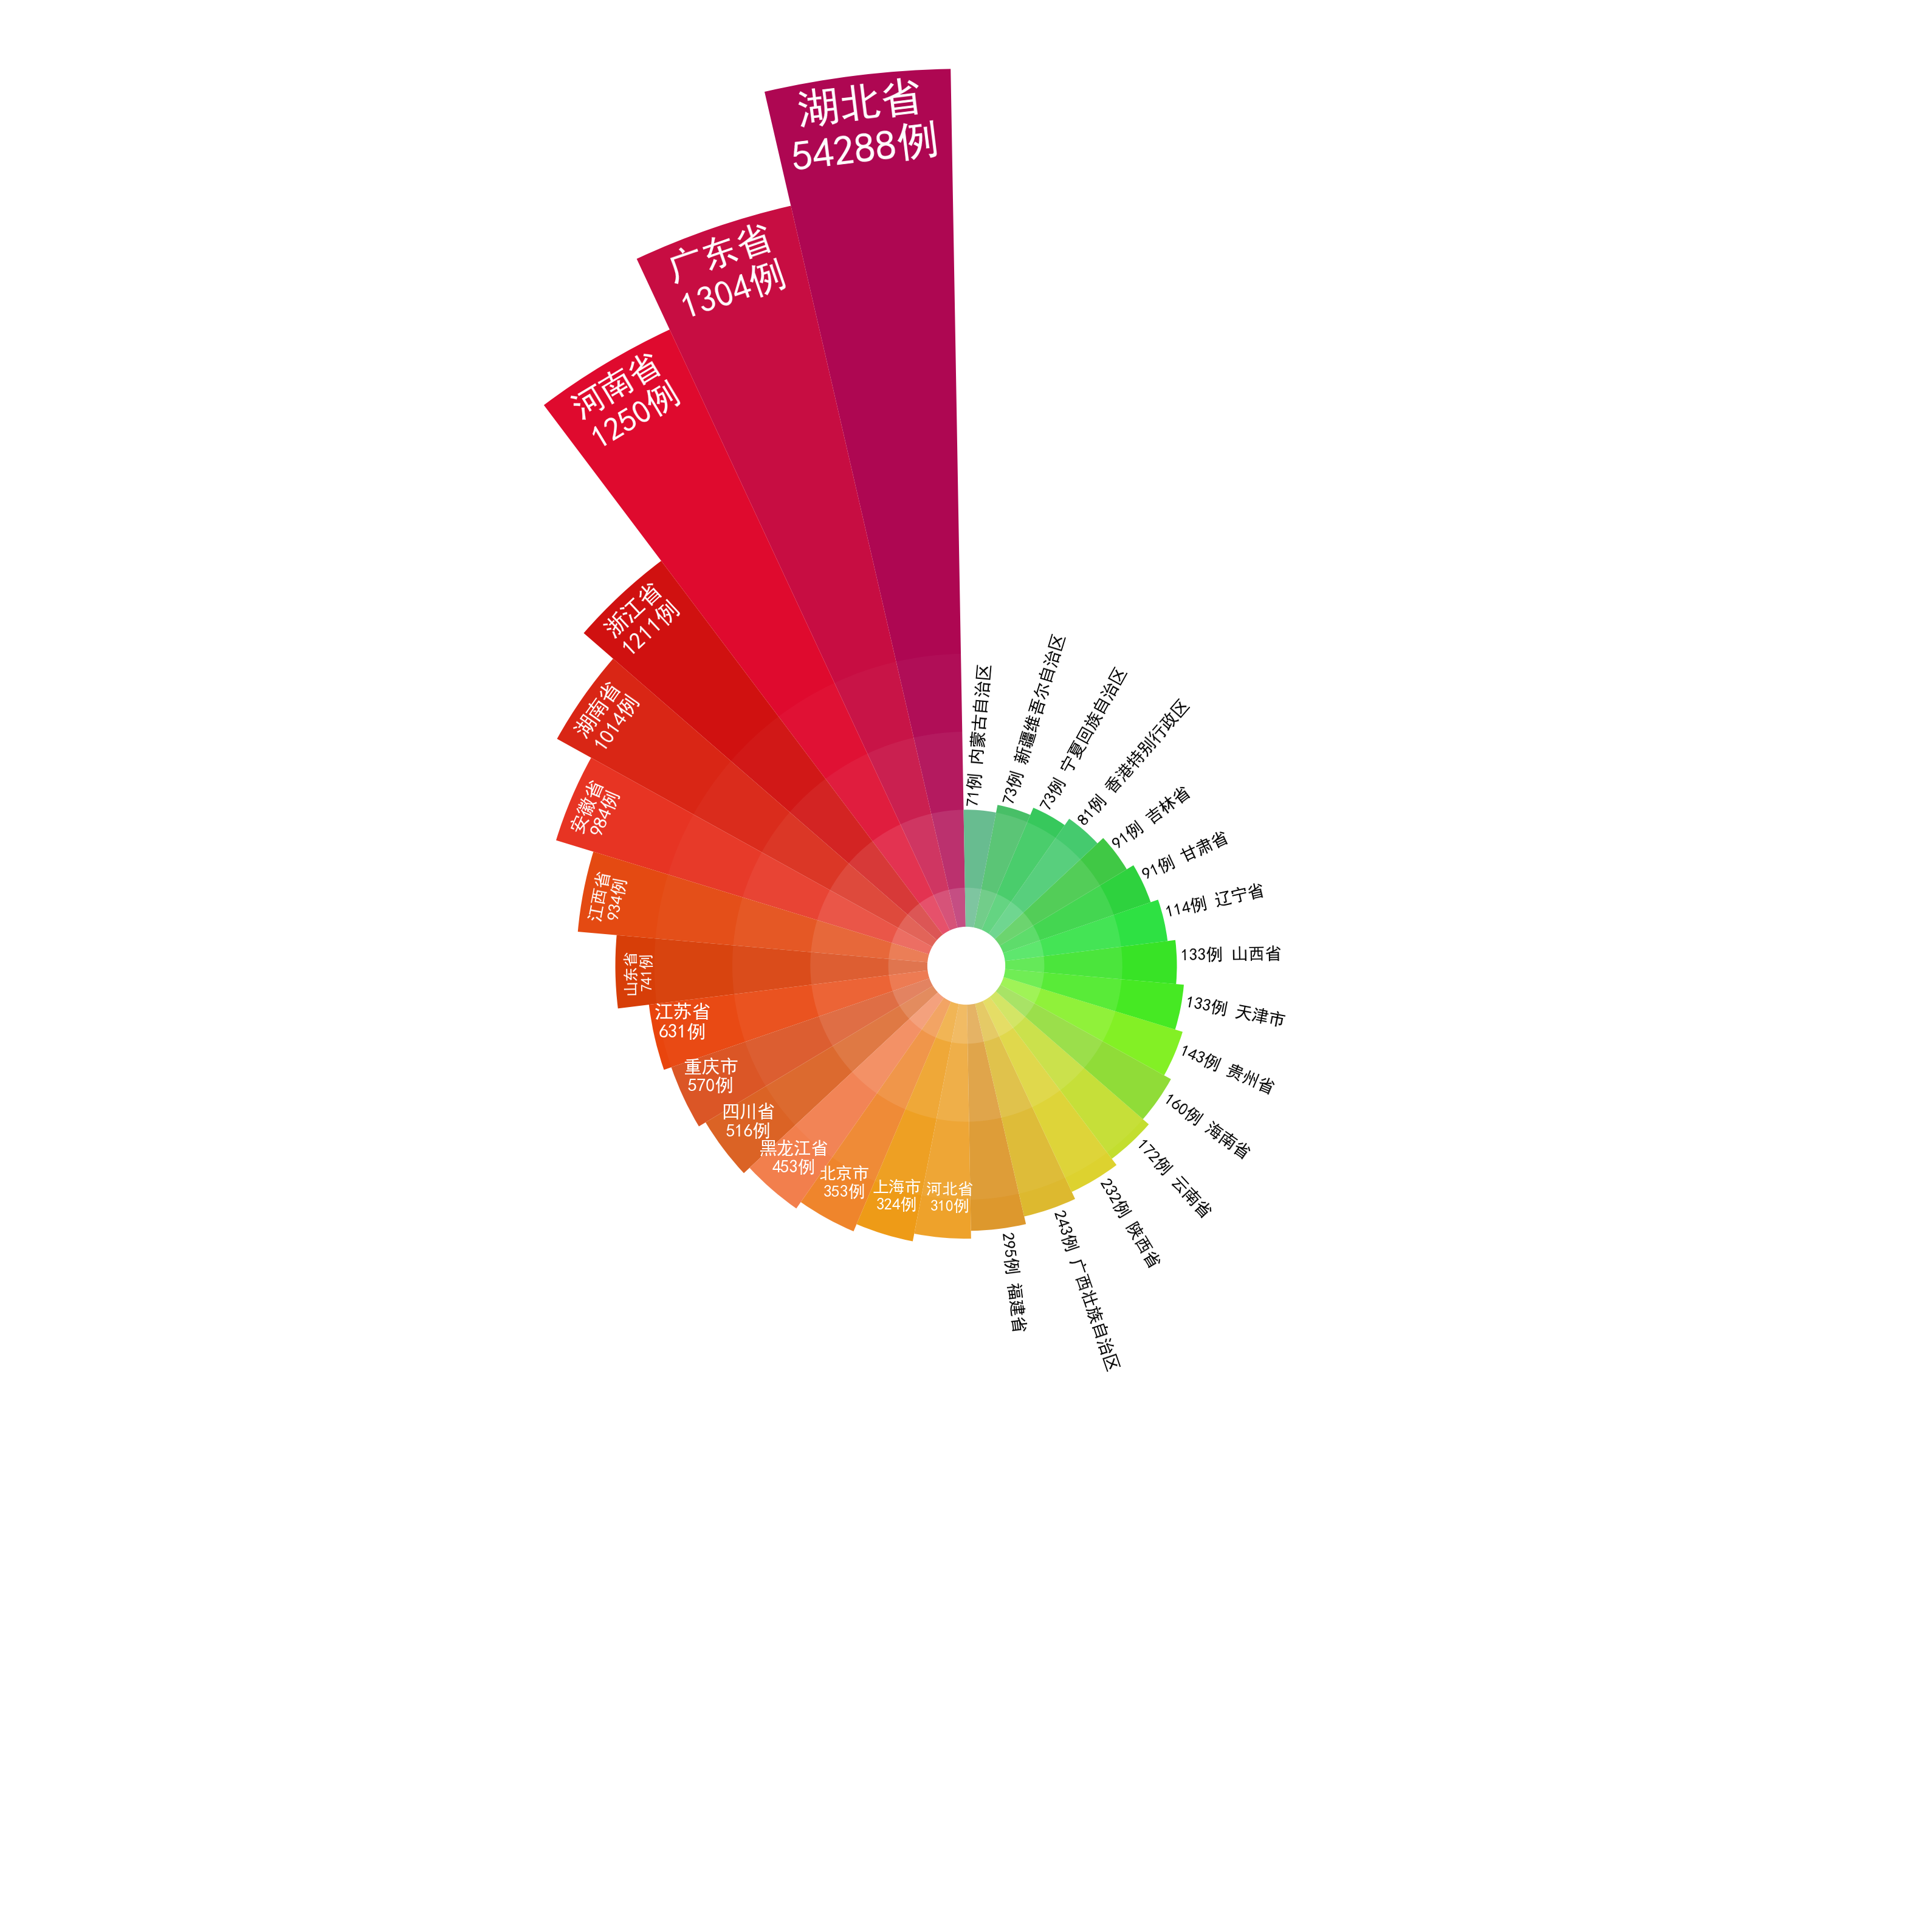

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def rosetype_pie(country,confirmed,size,colors):
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文显示
    #plt.rcParams['font.sans-serif'] = ['Songti SC']  # 中文显示

    num= len(size) # 柱子的数量
    width = 2 * np.pi / num # 每个柱子的宽度
    rad = np.cumsum([width] * num)  # 每个柱子的角度
    
    plt.figure(figsize=(8, 8),dpi=500,)  # 创建画布
    ax = plt.subplot(projection='polar')
    ax.set_ylim(-1, np.ceil(max(size) + 1))  # 中间空白,-1为空白半径大小，可自行调整
    ax.set_theta_zero_location('N',-5.0)  # 设置极坐标的起点方向 W,N,E,S, -5.0为偏离数值，可自行调整
    ax.set_theta_direction(1) # 1为逆时针，-1为顺时针
    ax.grid(False)  # 不显示极轴
    ax.spines['polar'].set_visible(False)  # 不显示极坐标最外的圆形
    ax.set_yticks([])  # 不显示坐标间隔
    ax.set_thetagrids([])  # 不显示极轴坐标

    ax.bar(rad, size, width=width, color=colors, alpha=1) # 画图
    ax.bar(rad, 1, width=width, color='white', alpha=0.15)  # 中间添加白色色彩使图案变浅
    ax.bar(rad, 3, width=width, color='white', alpha=0.1)  # 中间添加白色色彩使图案变浅
    ax.bar(rad, 5, width=width, color='white', alpha=0.05)  # 中间添加白色色彩使图案变浅
    ax.bar(rad, 7, width=width, color='white', alpha=0.03)  # 中间添加白色色彩使图案变浅

    # 设置text
    for i in np.arange(num):
        if i < 8:
            ax.text(rad[i],  # 角度
                    size[i]-0.2,  # 长度
                    country[i]+'\n'+str(confirmed[i])+'例',  # 文本
                    rotation=rad[i] * 180 / np.pi -5,  # 文字角度
                    rotation_mode='anchor',
                    # alpha=0.8,#透明度
                    fontstyle='normal',# 设置字体类型，可选参数[ ‘normal’ | ‘italic’ | ‘oblique’ ]，italic斜体，oblique倾斜
                    fontweight='black', # 设置字体粗细，可选参数 [‘light’, ‘normal’, ‘medium’, ‘semibold’, ‘bold’, ‘heavy’, ‘black’]
                    color='white', # 设置字体颜色
                    size=size[i]/2.2, # 设置字体大小
                    ha="center", # 'left','right','center'
                    va="top", # 'top', 'bottom', 'center', 'baseline', 'center_baseline'
                    )
        elif i < 15:
            ax.text(rad[i]+0.02,
                    size[i]-0.7,
                    country[i] + '\n' + str(confirmed[i]) + '例',
                    fontstyle='normal',
                    fontweight='black',
                    color='white',
                    size=size[i] / 1.6,
                    ha="center",
                    )
        else:
            ax.text(rad[i],
                    size[i]+0.1,
                    str(confirmed[i]) + '例 ' + country[i],
                    rotation=rad[i] * 180 / np.pi + 85,
                    rotation_mode='anchor',
                    fontstyle='normal',
                    fontweight='black',
                    color='black',
                    size=4,
                    ha="left",
                    va="bottom",
                    )

    plt.show()


if __name__ == '__main__':
    #df = pd.read_csv('Wuhan-2019-nCoV.csv') # 利用pandas读取数据
    colors = [(0.68359375, 0.02734375, 0.3203125),
                    (0.78125, 0.05078125, 0.2578125),
                    (0.875, 0.0390625, 0.1796875),
                    (0.81640625, 0.06640625, 0.0625),
                    (0.8515625, 0.1484375, 0.08203125),
                    (0.90625, 0.203125, 0.13671875),
                    (0.89453125, 0.2890625, 0.0703125),
                    (0.84375, 0.2421875, 0.03125),
                    (0.9140625, 0.26953125, 0.05078125),
                    (0.85546875, 0.31640625, 0.125),
                    (0.85546875, 0.3671875, 0.1171875),
                    (0.94921875, 0.48046875, 0.28125),
                    (0.9375, 0.51171875, 0.1484375),
                    (0.93359375, 0.59765625, 0.0625),
                    (0.93359375, 0.62890625, 0.14453125),
                    (0.86328125, 0.5859375, 0.15234375),
                    (0.86328125, 0.71875, 0.16015625),
                    (0.86328125, 0.8203125, 0.16015625),
                    (0.76171875, 0.8671875, 0.16015625),
                    (0.53125, 0.85546875, 0.15625),
                    (0.4765625, 0.94140625, 0.0703125),
                    (0.21484375, 0.91015625, 0.0625),
                    (0.15234375, 0.88671875, 0.08203125),
                    (0.11328125, 0.87890625, 0.19921875),
                    (0.11328125, 0.8125, 0.1796875),
                    (0.1875, 0.76953125, 0.2109375),
                    (0.2109375, 0.78125, 0.38671875),
                    (0.1484375, 0.76953125, 0.30859375),
                    (0.22265625, 0.73046875, 0.35546875),
                    (0.2890625, 0.6875, 0.4765625)]                             # 转化为小数的rgb色列表 34个颜色

    df = pd.DataFrame(columns=['province','province_confirmedCount'])  # 省份及确诊人数
    df.province = result['province']
    df.province_confirmedCount = result['province_confirmedCount']
    df=df.sort_values('province_confirmedCount',ascending=False)
    provice34 = df['province'].tolist()   # 转换为 list
    confirmed = df['province_confirmedCount'].tolist()
    size = [22 , 19, 17, 12, 11, 10, 9, 8, 7.2, 7.0, 6.8, 6.6, 6.4, 6.2, 6.0, 5.8, 5.6, 5.4, 5.2, 5.0, 4.8, 4.6, 4.4, 4.2, 4.0, 3.8, 3.6, 3.4, 3.2, 3.0] # 自定义一个柱长度列
    rosetype_pie(provice34, confirmed, size, colors)   


统计3月15日各省累计治愈人数与确诊人数的比例并绘制图形

In [102]:
# result = {'province':[],'province_confirmedCount':[]}


with open("./data/中国各省疫情数据0123至0315.csv",'r',encoding='gbk') as csvFile:
    reader = csv.reader(csvFile)
    for item in reader:
            if item[1] =="2020年3月15日":
                result['province'].append(item[0])
                if item[7]=='' or item[5]=='':
                    rate=0
                else:
                    rate=int(item[7])/int(item[5])
                result['province_confirmedCount'].append(rate)
# result['province_confirmedCount'].sort(reverse=True)
print(result)

{'province': ['安徽省', '澳门特别行政区', '北京市', '福建省', '甘肃省', '广东省', '广西壮族自治区', '贵州省', '海南省', '河北省', '河南省', '黑龙江省', '湖北省', '湖南省', '吉林省', '江苏省', '江西省', '辽宁省', '内蒙古自治区', '宁夏回族自治区', '青海省', '山东省', '山西省', '陕西省', '上海市', '四川省', '台湾省', '天津市', '西藏自治区', '香港特别行政区', '新疆维吾尔自治区', '云南省', '浙江省', '重庆市', '安徽省', '澳门特别行政区', '北京市', '福建省', '甘肃省', '广东省', '广西壮族自治区', '贵州省', '海南省', '河北省', '河南省', '黑龙江省', '湖北省', '湖南省', '吉林省', '江苏省', '江西省', '辽宁省', '内蒙古自治区', '宁夏回族自治区', '青海省', '山东省', '山西省', '陕西省', '上海市', '四川省', '台湾省', '天津市', '西藏自治区', '香港特别行政区', '新疆维吾尔自治区', '云南省', '浙江省', '重庆市'], 'province_confirmedCount': [984, 10, 353, 295, 91, 1304, 243, 143, 160, 310, 1250, 453, 54288, 1014, 91, 631, 934, 114, 71, 73, 18, 741, 133, 232, 324, 516, 0, 133, 1, 81, 73, 172, 1211, 570, 0.9939393939393939, 1.0, 0.7986425339366516, 0.9966216216216216, 0.6842105263157895, 0.9588235294117647, 0.9642857142857143, 0.9794520547945206, 0.9523809523809523, 0.9748427672955975, 0.9819324430479183, 0.9398340248962656, 0.8007788299849544, 0.9960707269155207

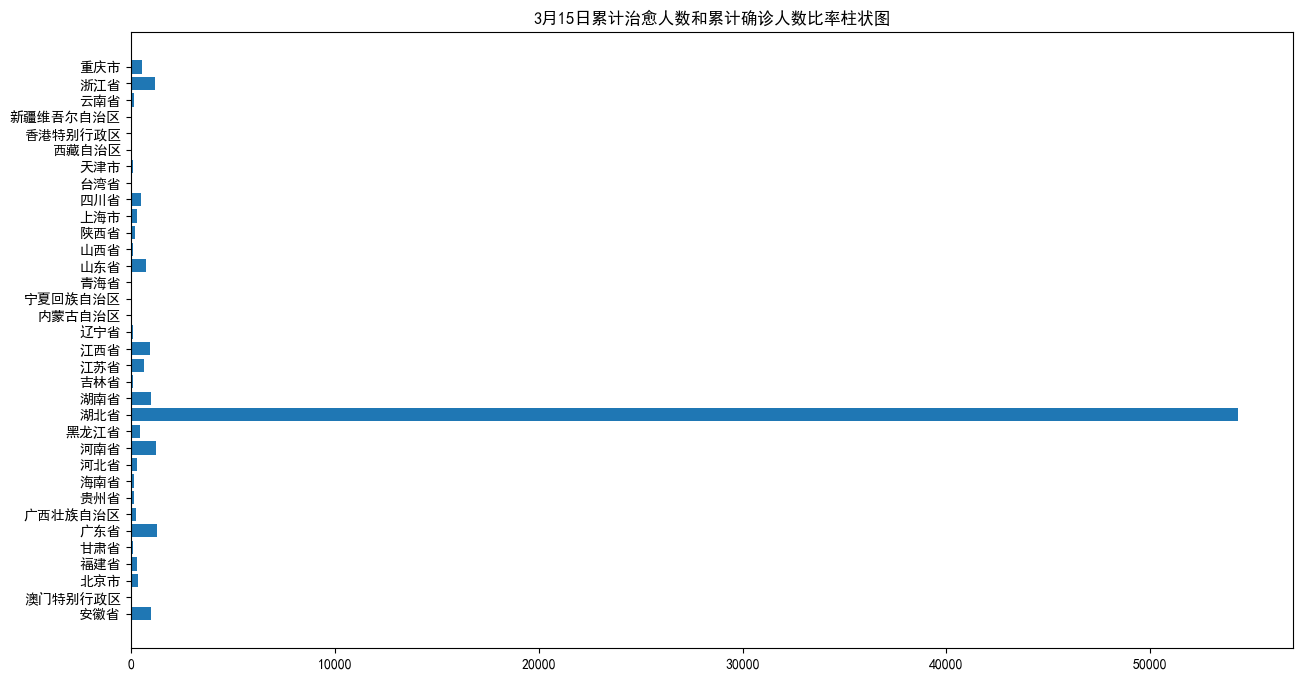

In [103]:
bar_width = 0.8  #柱的宽度
fig = plt.figure(figsize = (15,8))

plt.barh(result['province'],result['province_confirmedCount'],bar_width)
plt.title("3月15日累计治愈人数和累计确诊人数比率柱状图")  # 绘制标题
plt.show()

分别统计3月15日各省累计治愈人数与确诊人数并绘制堆叠图

In [104]:
result = {'province':[],'province_confirmedCount':[],'province_healedCount':[]}


with open("./data/中国各省疫情数据0123至0315.csv",'r',encoding='gbk') as csvFile:
    reader = csv.reader(csvFile)
    for item in reader:
            if item[1] =="2020年3月15日":
                result['province'].append(item[0])
                if item[7]=='':
                    result['province_confirmedCount'].append(0)
                else:
                    result['province_confirmedCount'].append(int(item[7]))
                if item[5]=='':
                    result['province_healedCount'].append(0)
                else:
                    result['province_healedCount'].append(int(item[5]))
# result['province_confirmedCount'].sort(reverse=True)
print(result)

{'province': ['安徽省', '澳门特别行政区', '北京市', '福建省', '甘肃省', '广东省', '广西壮族自治区', '贵州省', '海南省', '河北省', '河南省', '黑龙江省', '湖北省', '湖南省', '吉林省', '江苏省', '江西省', '辽宁省', '内蒙古自治区', '宁夏回族自治区', '青海省', '山东省', '山西省', '陕西省', '上海市', '四川省', '台湾省', '天津市', '西藏自治区', '香港特别行政区', '新疆维吾尔自治区', '云南省', '浙江省', '重庆市'], 'province_confirmedCount': [984, 10, 353, 295, 91, 1304, 243, 143, 160, 310, 1250, 453, 54288, 1014, 91, 631, 934, 114, 71, 73, 18, 741, 133, 232, 324, 516, 0, 133, 1, 81, 73, 172, 1211, 570], 'province_healedCount': [990, 10, 442, 296, 133, 1360, 252, 146, 168, 318, 1273, 482, 67794, 1018, 93, 631, 935, 125, 75, 75, 18, 760, 133, 245, 353, 539, 0, 136, 1, 145, 76, 174, 1231, 576]}


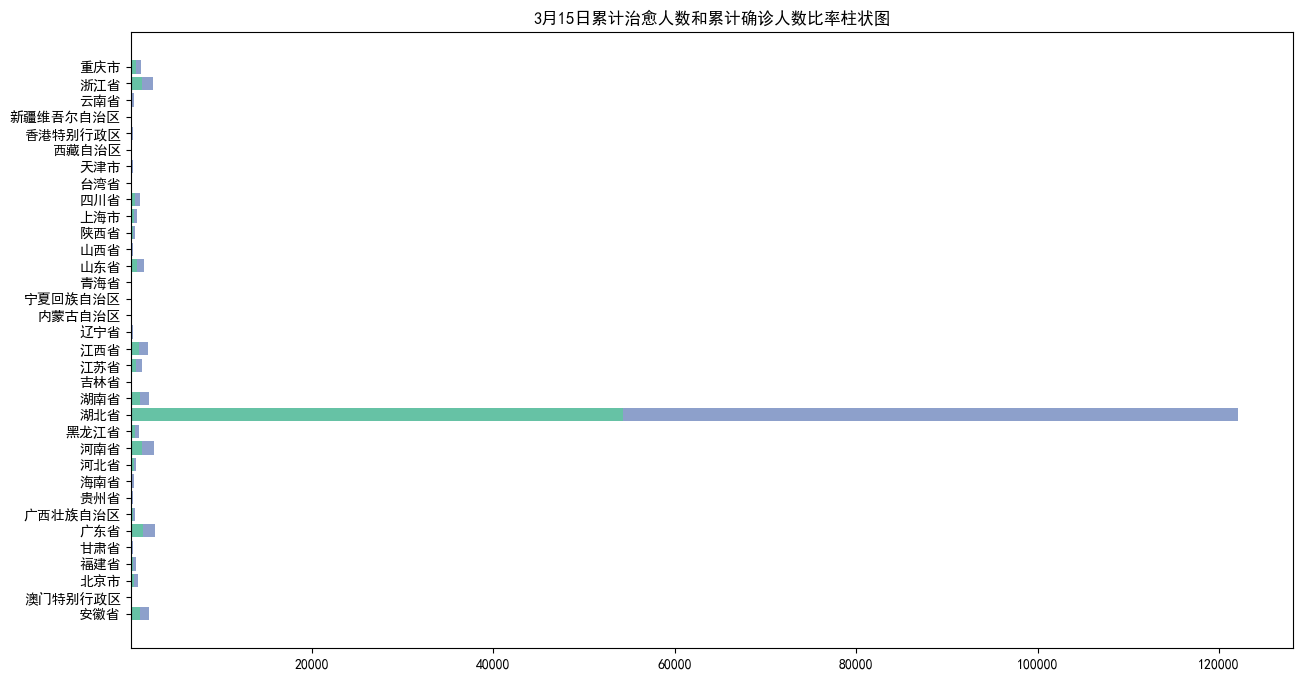

In [114]:
bar_width = 0.8  #柱的宽度
fig = plt.figure(figsize = (15,8))

plt.barh(result['province'],result['province_confirmedCount'],bar_width,color="#66c2a5")
plt.barh(result['province'],result['province_healedCount'],bar_width,left=result['province_confirmedCount'],color="#8da0cb")
plt.title("3月15日累计治愈人数和累计确诊人数堆叠图")  # 绘制标题
plt.show()